In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Wikipediaから引っ張ってきた艦艇のデータを読み込む
sd = pd.read_csv('艦艇データ.csv', index_col = False, delimiter = ",",
                 encoding = 'utf-8')
 
sd["進水日"] = pd.to_datetime(sd["進水日"])

In [4]:
birthday = sd['進水日']
name = sd["艦名"].values.tolist()
Displacement = sd["基準排水量"]
length = sd["全長"] 
Armor = Displacement // length /2
HP = sd["出力"] // 1000
Speed = sd["最大速力"]
speed = sd["最大速力"] * 10
sk = sd["主砲口径"].copy()
ss = sd["主砲装数"].copy()
st = sd['主砲搭載数'].copy()

#主砲の口径ごとに火力値をつけている
sk[sk == 12.0] = 1
sk[sk == 12.7] = 1
sk[sk == 10.0] = 1.5
sk[sk == 14.0] = 2.5
sk[sk == 15.0] = 2
sk[sk == 15.5] = 2.5
sk[sk == 20.0] = 3.5
sk[sk == 20.3] = 4
sk[sk == 35.6] = 5
sk[sk == 41.0] = 10
sk[sk == 46.0] = 12
sk[sk == 38.0] = 8
sk[sk == 40.6] = 8.5

Power = sk * ss * st
CP = (Armor + HP + speed + Power)
build = sd["建造数"]
ACP = CP * (build/2) 

sdb = pd.DataFrame({'艦名': name, '装甲': Armor, '出力': HP, '最大速力': Speed, '火力': Power, '戦闘力': CP, '総合戦闘力': ACP, '進水日': birthday})

DD = sdb[sdb["艦名"].str.contains("駆逐艦")]
LC = sdb[sdb["艦名"].str.contains("軽巡洋艦")]
HC = sdb[sdb["艦名"].str.contains("重巡洋艦")]
BS = sdb[sdb["艦名"].str.contains("戦艦")]

Destroyer = sd[sd["艦名"].str.contains("駆逐艦")]
LightCruiser = sd[sd["艦名"].str.contains("軽巡洋艦")]
HeavyCruiser = sd[sd["艦名"].str.contains("重巡洋艦")]
BattleShip = sd[sd["艦名"].str.contains("戦艦")]

colors = ['b'] * len(DD)
colors += ['c'] * len(LC)
colors += ['g']* len(HC)
colors += ['r'] * len(BS)

DataList = pd.DataFrame({'艦名': sd['艦名'],'基準排水量':sd['基準排水量'],'全長':sd['全長'], '装甲':sdb['装甲'],
                        '出力': sd['出力'], '最大速力':sd['最大速力'], '主砲口径':sd['主砲口径'],
                        '主砲装数':sd['主砲装数'], '主砲搭載数': sd['主砲搭載数'], '火力':sdb['火力'],
                        '戦闘力':sdb['戦闘力'], '総合戦闘力':sdb['総合戦闘力'], '建造数':sd['建造数'], 'color': colors, '進水日': sd['進水日']})

In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot, font_manager
import matplotlib

#大きい順にソートしたグラフを作る関数
def glaph_generate_sort (glaph1):
    fontprop = matplotlib.font_manager.FontProperties(fname = 'meiryo.ttc', size = 16)
    sortList = DataList.sort_values(glaph1)
    plt.figure(figsize = (12,5),)
    plt.bar(sortList['艦名'], sortList[glaph1], color = sortList['color'], width = 0.8, alpha = 0.5)
    
    plt.xticks(x, sortList['艦名'] , fontproperties = fontprop, rotation = -90)
    plt.title(glaph1, fontproperties = fontprop)
    plt.grid(color = 'gray')

#艦艇の種類ごとに並べられたグラフを作る関数
def glaph_generate (glaph1):
    fontprop = matplotlib.font_manager.FontProperties(fname = 'meiryo.ttc', size = 16)
    plt.figure(figsize = (12,5),)
    plt.bar(DataList['艦名'], DataList[glaph1], color = DataList['color'], width = 0.8, alpha = 0.5)
    plt.xticks(x, DataList['艦名'] , fontproperties = fontprop, rotation = -90)
    plt.title(glaph1, fontproperties = fontprop)
    plt.grid(color = 'gray')

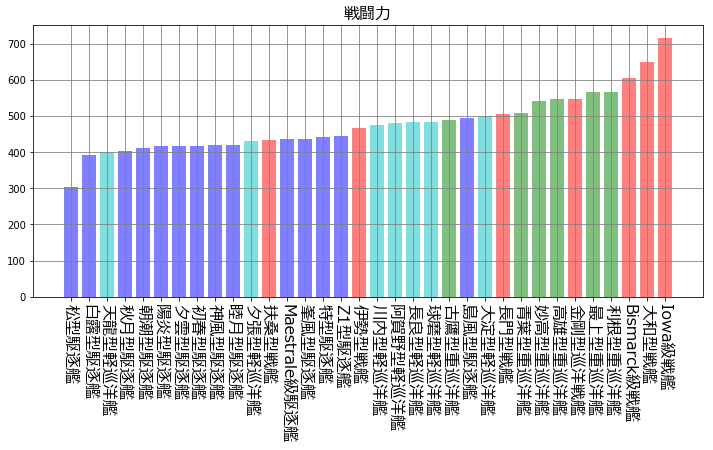

In [7]:
glaph_generate_sort('戦闘力')
#引数に並べたいデータの名前を入れるとそのデータでグラフが作られる